# Amrit Parimi
ap4142

# Problem 1

1.1. This Dataset is not linearly separable. \\
A linear classifier cannot be trained to classify this dataset efficiently. \\
Because as we can see in the figure below, class1 has datapoints in quandrant1 and quadrant3; class2 has datapoints in quandrant2 and quadrant4. Therefore no line can separate the 2 classes. \\

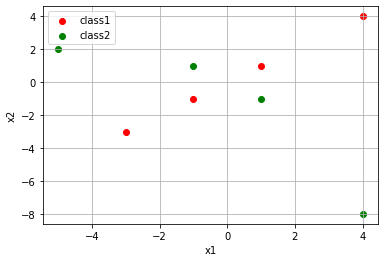

In [84]:
import numpy as np
import matplotlib.pyplot as plt

class1 = [[-1,-1],[1,1],[-3,-3],[4,4]]
class2 = [[-1,1],[1,-1],[-5,2],[4,-8]]

plt.scatter([i[0] for i in class1],[i[1] for i in class1],color='red',label='class1')
plt.scatter([i[0] for i in class2],[i[1] for i in class2],color='green',label='class2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('')
plt.grid()
plt.legend()
plt.show()

1.2. We can define $z = x_1*x_2$. \\
For class1: $z = [1,1,9,16]$ \\
For class2: $z = [-1,-1,-10,-32]$ \\
All the elements in class1 have $z<0$ \\
All the elements in class2 have $z>0$ \\
Therefore $z=0$ separates class1 and class2.

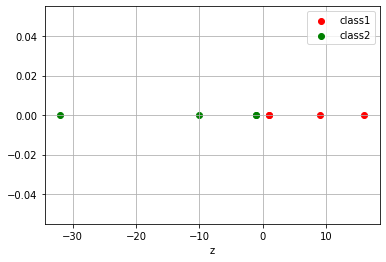

In [85]:
z_class1 = [i*j for i,j in class1]
z_class2 = [i*j for i,j in class2]
x = [0 for _ in range(len(z_class1))]
plt.scatter(z_class1,x,color='red',label='class1')
plt.scatter(z_class2,x,color='green',label='class2')
plt.xlabel('z')
plt.grid()
plt.legend()
plt.show()

1.3 The separating hyperplane $z=0$ looks like the x and y axes in the 2d plane. \\
In the 3-d space($x_1,x_2,z$), the separating hyperplane includes 2 planes, 1 passing through the $x_1, z$ axes and the other passing through the $x_2,z$ axes.

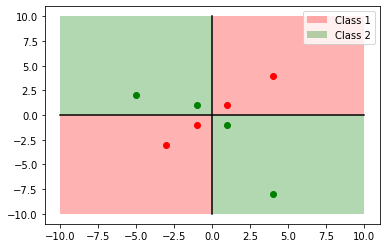

In [86]:
# The hyperplane looks like the x and y axes

fig,ax = plt.subplots()
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
ax.fill_between(x[49:],0,10,facecolor='red',alpha=0.3,label='Class 1')
ax.fill_between(y[:50],-10,0,facecolor='red',alpha=0.3)
ax.fill_between(x[:50],0,10,facecolor='green',alpha=0.3,label='Class 2')
ax.fill_between(y[49:],-10,0,facecolor='green',alpha=0.3)
ax.legend()

plt.plot([0 for _ in range(100)],x,color='black')
plt.plot(y,[0 for _ in range(100)],color='black')
plt.scatter([i[0] for i in class1],[i[1] for i in class1],color='red')
plt.scatter([i[0] for i in class2],[i[1] for i in class2],color='green')
plt.show()

1.4 Importance of nonlinear transformations:- \\
Not all data is linearly separable.(Ex:- 1.1) \\
In such cases, applying linear transformations does not make the classification problem easier as the correlation between the features remains the same even after the transformation. \\
But applying nonlinear transformations can change the correlations between features and thereby reveal hidden patterns which make the data separable.


# Problem 2

2.1) We know $E[\epsilon] = 0$, $\epsilon$ is independent of any function of x and $Var(\epsilon) = E[\epsilon^2] - (E[\epsilon])^2 = E[\epsilon^2]$ \\
$Var(g(x)) = E[(g(x) - E[g(x)])^2]$ \\
$Bias(g(x)) = E[g(x)] - f(x)$ 
$MSE = \frac{1}{t} \sum_{i=1}^{t}(f(x_i) + \epsilon - g(x_i))^2 = E[(f(x) -\epsilon - g(x))^2] \\
MSE = E[(f(x) + \epsilon - g(x))^2] = E[(f(x) - g(x))^2 + \epsilon^2 + 2\epsilon (f(x)-g(x))] = E[(f(x) - g(x))^2] + E[\epsilon^2] + 2E[\epsilon]E[f(x)-g(x)] = E[(f(x) - g(x))^2] + E[\epsilon^2] \\
= E[(f(x) - g(x))^2] + Var(\epsilon) \\
= E[((f(x)-E[g(x)]) - (g(x)-E[g(x)]))^2] + Var(\epsilon) \\
= E[(f(x)-E[g(x)])^2] + E[(g(x)-E[g(x)])^2] - 2E[(f(x)-E[g(x)])(g(x)-E[g(x)])] + Var(\epsilon) \\
= (Bias(g(x)))^2 + Var(g(x)) - 2(f(x)-E[g(x)])E[g(x)-E[g(x)]] + Var(\epsilon)\\
= (Bias(g(x)))^2 + Var(g(x)) - 2(f(x)-E[g(x)])(E[g(x)] - E[g(x)]) + Var(\epsilon) \\
= (Bias(g(x)))^2 + Var(g(x)) + Var(\epsilon) \\
= Bias^2 + Variance + Noise \\
\therefore E[MSE] = E[(Bias(g(x)))^2] + E[Var(g(x))] + Var(\epsilon)$ \\
 expectation over the distribubtion of the data.


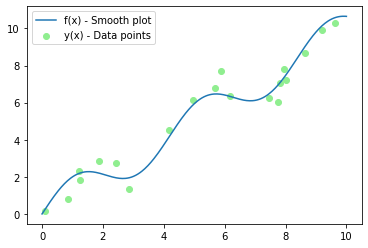

In [87]:
# 2.2

x = np.random.uniform(0,10,20)
f = x + np.sin(1.5*x)
eps = np.random.normal(0,0.5477,20)
y = [f[i]+eps[i] for i in range(20)]
plt.scatter(x,y,color='lightgreen',label='y(x) - Data points')

x_dash = np.linspace(0,10,300)
f_dash = x_dash + np.sin(1.5*x_dash)
plt.plot(x_dash,f_dash,label='f(x) - Smooth plot')

plt.legend()
plt.show()

Coeff of g1(x) [0.93609179 0.47213881]
Coeff of g3(x) [ 0.01285767 -0.19831373  1.76471462 -0.22121998]
Coeff of g10(x) [-1.29470631e-05  6.48966495e-04 -1.36177389e-02  1.54204086e-01
 -1.00895778e+00  3.75134033e+00 -6.97216263e+00  3.19133122e+00
  6.48759352e+00 -4.85543049e+00  5.72867613e-01]


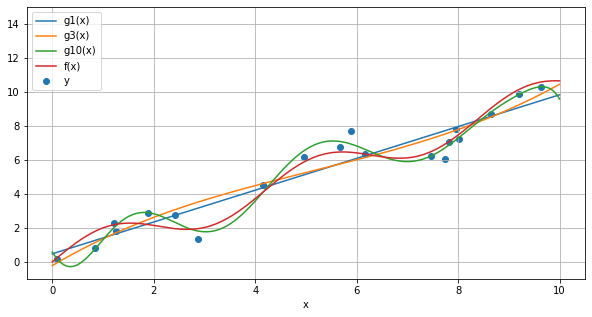

In [89]:
# 2.3

def poly_data(x,n):
    data = np.empty((len(x),n))
    for i in range(len(x)):
        for j in range(n):
            data[i,j] = x[i]**(j+1)
    return data

plt.gcf().set_size_inches(10, 5)

plt.scatter(x,y,label='y')
w1 = np.polyfit(x,y,1)
plt.plot(x_dash,np.polyval(w1,x_dash),label='g1(x)')
# plt.show()
print('Coeff of g1(x)',w1)

w2 = np.polyfit(x,y,3)
plt.plot(x_dash,np.polyval(w2,x_dash),label='g3(x)')
# plt.scatter(x,y)
# plt.ylim(-1,10)
# plt.show()
print('Coeff of g3(x)',w2)

w3 = np.polyfit(x,y,10)
plt.plot(x_dash,np.polyval(w3,x_dash),label='g10(x)')
# plt.scatter(x,y)
plt.ylim(-1,15)
print('Coeff of g10(x)',w3)

plt.plot(x_dash,f_dash,label='f(x)')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.show()


2.3 We can observe that $g_1(x)$ and $g_3(x)$ are underfitting as the estimate is not very close to f(x) and $g_{10}(x)$ is overfitting as it can be seen clearly near the ends.

In [96]:
# 2.4
import random
random.seed(42)
x = np.random.rand(50)*10
# print(x)
x_dash = np.linspace(0,10,300)
x_train = x[:40]
x_test = x[40:]
f_dash = x_dash + np.sin(1.5*x_dash)
f_train = x_train + np.sin(1.5*x_train)
f_test = x_test + np.sin(1.5*x_test)
y_test = f_test + np.random.normal(0,0.5477,10)


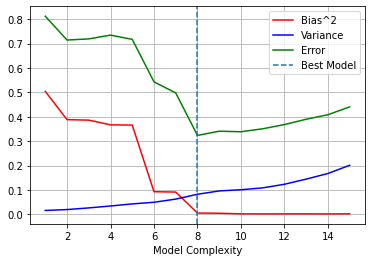

The best model occurs at n=8


In [97]:

pred = [[] for _ in range(15)]
err = [[] for _ in range(15)]
for i in range(100):
    y_train = f_train + np.random.normal(0,0.5477,40)
    while(len(set(y_test).intersection(set(y_train)))!=0):
        y_train = f_train + np.random.normal(0,0.5477,40)
    for j in range(1,16):
        w = np.polyfit(x_train,y_train,j)
        temp = np.polyval(w,x_test)
        pred[j-1].append(temp)
        err[j-1].append(np.mean((temp-y_test)**2))
        if(j==10):
            w10 = w
average = [np.mean(np.array(pred[i]),axis=0) for i in range(15)]

bias2 = [0 for _ in range(15)]
var = [0 for _ in range(15)]
error = [0 for i in range(15)]
for i in range(15):
    bias2[i] = np.mean((average[i] - f_test)**2)
    var[i] = np.mean([(pred[i][j] - average[i])**2 for j in range(len(pred[0]))])
    error[i] = np.mean(err[i])
n_best = np.argmin([error[i] for i in range(len(bias2))])+1
plt.plot([i+1 for i in range(15)],bias2,color='red',label='Bias^2')
plt.plot([i+1 for i in range(15)],var,color='blue',label='Variance')
plt.plot([i+1 for i in range(15)],error,color='green',label='Error')
plt.axvline(n_best,linestyle='--',label='Best Model')
plt.xlabel('Model Complexity')
plt.legend()
plt.grid()
plt.show()
print('The best model occurs at n={}'.format(n_best))

In [105]:
# 2.5
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

pred=[]
err=[]
for i in range(100):
    y_train = f_train + np.random.normal(0,0.5477,40)
    while(len(set(y_test).intersection(set(y_train)))!=0):
        y_train = f_train + np.random.normal(0,0.5477,40)
    reg = linear_model.Ridge(alpha=0.5)
    reg.fit(poly_data(x_train,10),y_train,10)
    temp = reg.predict(poly_data(x_test,10))
    pred.append(temp)
    err.append(np.mean((temp-y_test)**2))
# plt.plot([i+1 for i in range(15)],bias2)
# plt.plot([i+1 for i in range(15)],var)
average = np.mean(np.array(pred),axis=0)
bias1 = np.mean((f_test - average)**2)
var1 = np.mean((pred - average)**2)

# plt.plot(x_dash,reg.predict(poly_data(x_dash,10)),label='L2 Regularized')
# plt.plot(x_dash,np.polyval(w10,x_dash),label='Without Regularization')
# plt.plot(x_dash,f_dash,label='f(x)')

# plt.legend()
# plt.grid()
# plt.show()
print('The Bias^2 for the model without Regularization = ',bias2[9])
print('The Bias^2 for the model with Regularization = ',bias1,'\n')

print('The Variance for the model without Regularization = ',var[9])
print('The Variance for the model with Regularization = ',var1,'\n')

error1 = np.mean(err)
print('The MSE for the model without Regularization = ',error[9])
print('The MSE for the model with Regularization = ',error1)


The Bias^2 for the model without Regularization =  0.0021190543822072407
The Bias^2 for the model with Regularization =  0.002271131602449748 

The Variance for the model without Regularization =  0.1008916686987374
The Variance for the model with Regularization =  0.08384625808952678 

The MSE for the model without Regularization =  0.33862026810836177
The MSE for the model with Regularization =  0.31943710108769996


The order 10 regularized model has - \\
1. Higher bias
2. Lower variance
3. Lower MSE \\
when compared to the order 10 model without regularization. \\
By using regularization we expect the weights of our model to shrink and have lesser magnitude. This increases the generalization of the model and helps reduce overfitting on the training data. An increase in generalization causes a higher training error and increase in the bias. As overfitting reduces, the model variance reduces causing MSE on the test data to reduce.

# Problem 3

In [99]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [100]:
data1 = fetch_openml('page-blocks')
data2 = fetch_openml('led7')

3.1
Dataset1: page-blocks \\
No of features = 11 (including target) \\
No of instances = 5473 \\
No of classes = 5 \\
No of numerical features = 10 \\
No of categorical features = 1 \\


Dataset2: led7 \\
No of features = 8 (including target) \\
No of instances = 3200 \\
No of classes = 10 \\
No of numerical features = 0 \\
No of categorical features = 8 \\


Dataset - page-blocks
Model Accuracy for Random Forest for the 10 subsets =  [0.9570776255707762, 0.9598173515981735, 0.9662100456621004, 0.9643835616438357, 0.9680365296803652, 0.9698630136986301, 0.9762557077625571, 0.9771689497716894, 0.9789954337899544, 0.9771689497716894]
Model Accuracy for Gradient Boosting for the 10 subsets =  [0.9506849315068493, 0.9506849315068493, 0.9662100456621004, 0.965296803652968, 0.9662100456621004, 0.9689497716894977, 0.9698630136986301, 0.9707762557077626, 0.9735159817351599, 0.9735159817351599]
Model Training time for Random Forest for the 10 subsets =  [0.24831724166870117, 0.27010440826416016, 0.3516349792480469, 0.43329834938049316, 0.5161337852478027, 0.5926976203918457, 0.6591124534606934, 0.787306547164917, 0.8564391136169434, 0.9531033039093018]
Model Training time for Gradient Boosting for the 10 subsets =  [0.7743926048278809, 1.272960901260376, 1.8827972412109375, 2.357304096221924, 2.9592318534851074, 3.6229467391967773, 4.033799171447754

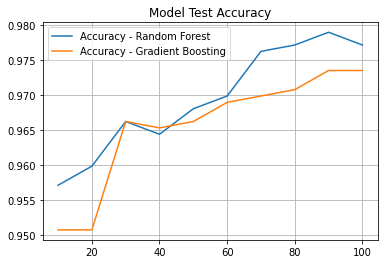

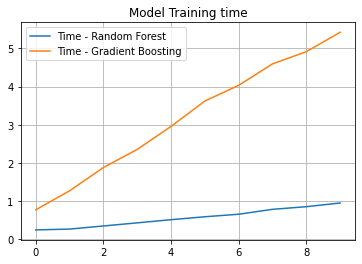

Dataset - led7
Model Accuracy for Random Forest for the 10 subsets =  [0.7203125, 0.7203125, 0.7203125, 0.7203125, 0.721875, 0.721875, 0.725, 0.721875, 0.73125, 0.7265625]
Model Accuracy for Gradient Boosting for the 10 subsets =  [0.7078125, 0.7171875, 0.728125, 0.725, 0.7296875, 0.725, 0.7265625, 0.7265625, 0.7296875, 0.728125]
Model Training time for Random Forest for the 10 subsets =  [0.15723061561584473, 0.16986751556396484, 0.1979970932006836, 0.17187237739562988, 0.18666481971740723, 0.1981360912322998, 0.2074267864227295, 0.21085238456726074, 0.2153611183166504, 0.2551429271697998]
Model Training time for Gradient Boosting for the 10 subsets =  [1.1026055812835693, 1.2048718929290771, 1.4213416576385498, 1.6660888195037842, 1.8362562656402588, 2.0306272506713867, 2.2239291667938232, 2.3951210975646973, 2.678378105163574, 2.932539939880371]


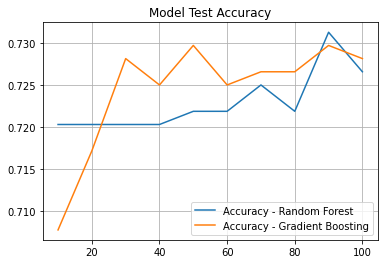

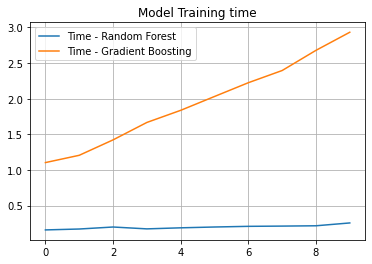

In [101]:
# 3.2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time

def f(data,dataset):
    print('Dataset -',dataset)
    x_train,x_test, y_train,y_test = train_test_split(data['data'],data['target'],test_size=0.2,random_state=42)
    sample_x = []
    sample_y = []

    for i in range(10,100,10):
        temp_x_train,_,temp_y_train,_ = train_test_split(x_train,y_train,train_size=i/100,random_state=42)
        sample_x.append(temp_x_train)
        sample_y.append(temp_y_train)
    sample_x.append(x_train)
    sample_y.append(y_train)

    acc1 = []
    acc2 = []
    time1 = []
    time2 = []
    for i in range(len(sample_x)):
        s1 = time.time()
        clf1 = RandomForestClassifier(random_state=0).fit(sample_x[i], sample_y[i])
        e1 = time.time()
        time1.append(e1-s1)
        s2 = time.time()
        clf2 = GradientBoostingClassifier(random_state=0).fit(sample_x[i], sample_y[i])
        e2 = time.time()
        time2.append(e2-s2)
        acc1.append(clf1.score(x_test,y_test))
        acc2.append(clf2.score(x_test,y_test))
    print('Model Accuracy for Random Forest for the 10 subsets = ',acc1)
    print('Model Accuracy for Gradient Boosting for the 10 subsets = ',acc2)
    print('Model Training time for Random Forest for the 10 subsets = ',time1)
    print('Model Training time for Gradient Boosting for the 10 subsets = ',time2)
    plt.plot([(i+1)*10 for i in range(len(sample_x))],acc1,label='Accuracy - Random Forest')
    plt.plot([(i+1)*10 for i in range(len(sample_x))],acc2,label='Accuracy - Gradient Boosting')
    plt.legend()
    plt.grid()
    plt.title('Model Test Accuracy')
    plt.show()
    plt.plot([_ for _ in range(len(sample_x))],time1,label='Time - Random Forest')
    plt.plot([_ for _ in range(len(sample_x))],time2,label='Time - Gradient Boosting')
    plt.legend()
    plt.grid()
    plt.title('Model Training time')
    plt.show()
f(data1,'page-blocks')
f(data2,'led7')

3.3 We can observe that the training time increases almost linearly with the size of the training dataset. \\
Although not completely monotonic the accuracy also increases with the size of the training dataset. \\
Time: Gradient Boosting has a much higher training time compared to Random Forest classifier for both the datasets. \\
Accuracy: For the page-blocks dataset, the Random Forest classifier achieves a slightly higher accuracy than the Gradient Boosting classifier. For the led7 dataset, although the accuracies are very close, the highest accuracy is reached by the Random Forest classifier. \\
Therefore we can conclude that in terms of accuracy, the Random Forest classifier is slightly better than the Gradient Boosting classifier. And in terms of Training time the Random Forest classifier has much shorter training time than the Gradient Boosting classifier. \\
The amount of training per unit time of the Random Forest classifier is much highher when compared to that of the Gradient Boosting algorithm.




# Problem 4

4.1 ROC - Receiver Operating Characteristic is a graph in which the True Positive rate(tpr) is plotted against the False Positive rate(fpr). \\
tpr = $\frac{tp}{tp+fn}$;  fpr = $\frac{fp}{tn+fp}$ \\
PR - Precision Recall curve is a graph in which the Precision is plotted against the Recall.
Precision = $\frac{tp}{tp+fp}$; Recall = $\frac{tp}{tp+fn}$ \\
Therefore, true negative matters for ROC curve but not PR curve. \\



Each point in ROC corresponds to a unique point in PR: \\
As we have data about the ROC curve, a point in the ROC curve corresponds to a value of fpr and tpr. \\
Which means we have 2 equations in tp,fp,fn,tn \\
As we know the details of the test set, we know the true values of the data. \\
Which means we know tp + fn and fp + tn. \\
$\therefore$ We have 4 equations and 4 variables(tp,tn,fp,fn). So we can obtain tp,tn,fp,fn by solving the equations. \\
Since there can be only onoe confusion matrix corresponding to the given model and data, we know the precision and recall from Precision = $\frac{tp}{tp+fp}$; Recall = $\frac{tp}{tp+fn}$ \\ which corresponds to a unique point in PR curve

In [106]:
# 4.2
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data = fetch_openml('gina_prior')
print(len(data['data']))
le.fit(data['target'])
data['cat'] = le.transform(data['target'])
print(len(set(data['target'])))

3468
2


In [107]:
x_train,x_test, y_train,y_test = train_test_split(data['data'],data['cat'],test_size=0.2,random_state=42)


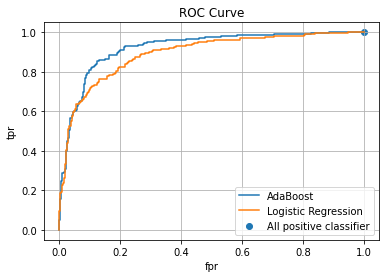

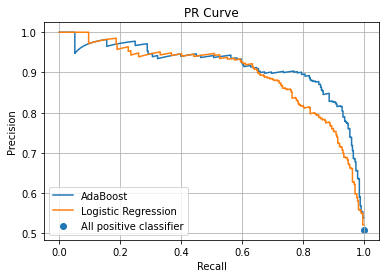

all positive is at -  (1, 0.5086455331412104)
PRG curves


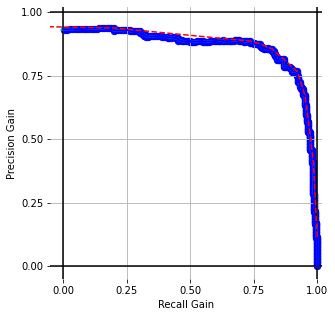

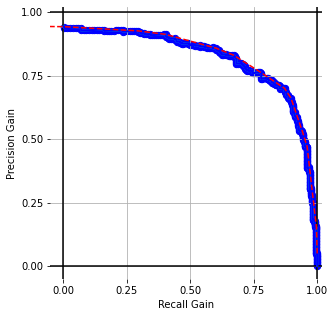

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf1.fit(x_train, y_train)
pred1 = clf1.predict_proba(x_test)[:,1]
# print(pred1,clf1.decision_function(x_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred1)
plt.plot(fpr,tpr,label='AdaBoost')


clf2 = LogisticRegression(random_state=0)
clf2.fit(x_train, y_train)
pred2 = clf2.predict_proba(x_test)[:,1]
# print(pred,y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred2)
plt.plot(fpr,tpr,label='Logistic Regression')

plt.scatter(1,1,label='All positive classifier')
plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()
plt.show()


precision1, recall1, thresholds = metrics.precision_recall_curve(y_test, pred1)
precision2, recall2, thresholds = metrics.precision_recall_curve(y_test, pred2)


plt.scatter(1,np.mean(y_test),label='All positive classifier')
plt.plot(recall1,precision1,label='AdaBoost')
plt.plot(recall2,precision2,label='Logistic Regression')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()
print('all positive is at - ',(1,np.mean(y_test)))



from prg import prg
print('PRG curves')
prg_curve1 = prg.create_prg_curve(y_test, pred1)
prg.plot_prg(prg_curve1)
plt.show()
prg_curve2 = prg.create_prg_curve(y_test, pred2)
prg.plot_prg(prg_curve2)
plt.show()

In [112]:
clf1_auc = metrics.roc_auc_score(y_test, pred1)
clf2_auc = metrics.roc_auc_score(y_test, pred2)
print('     Adaboost classifier','Logistic Regression')
print('AUROC',clf1_auc,clf2_auc)
print('AUPR ',metrics.auc(recall1,precision1),metrics.auc(recall2,precision2))
print('AUPRG',prg.calc_auprg(prg_curve1),prg.calc_auprg(prg_curve2))

     Adaboost classifier Logistic Regression
AUROC 0.9214940227459646 0.8926586526878952
AUPR  0.9152423752991733 0.8961976138090636
AUPRG 0.8638504636707831 0.8176753537021719


4.3 The difference between the AUPRG scores between the Adaboost classifier and Logistic Regression Classifier is greater than the difference of the AUPR values.

Yes, I agree with the conclusion of using PRG curves instead of PR curves. \\

* AUPRG has a proper interpretation as it is equivalent to the expected F gain score when opposed to the PR curve which has no proper geometric interpretation.
* It allows performance assessment over a range of operating points unlike PR curves which have unachievable regions.
* It is easier to calculate area under PR Gain curve than PR curve due to linear interpolation. \\
* The correlation between AUROC and AUPRG = 0.96 which is slightly greater than the correlation between AUPR and AUROC = 0.95. \\
* AUPRG ignores the early part of ranking(as it considers recall gain) and therefore assesses models better than AUPR which was proved with the example using white-clover dataset. \\
All these points have made me appreciate the advantage of using PRG curves over PR curves.